# Pride and Prejudice and Sense and Sensibility Data Analysis!

## *Requirement:* Annotate my code with markdown cells

To begin, we'll first install the necessary packages:

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import pandasql as ps
import re
import matplotlib.pyplot as plt
from collections import Counter


## *Requirement:* Read in TWO text data sources (in any format). For example, email chains or different pages from a book.

I will start by reading in the two Jane Austen books from project gutenberg: "Sense and Sensibility" and "Pride and Prejudice"

In [7]:
url_sense = "https://www.gutenberg.org/files/21839/21839-0.txt"
url_pride = "https://www.gutenberg.org/files/1342/1342-0.txt"

response_sense = requests.get(url_sense)
response_pride = requests.get(url_pride)

if response_sense.status_code == 200 and response_pride.status_code == 200:
    sense_data = response_sense.text
    pride_data = response_pride.text

Next I am splitting these books that have just been pulled in by their words.

In [8]:
# Data Cleaning and Splitting into Words for Sense and Sensibility
sense_words = sense_data.split()

# Data Cleaning and Splitting into Words for Pride and Prejudice
pride_words = pride_data.split()

Next, we'll make 2 series that will have the words extracted from the two texts.

In [9]:
# Convert lists to Series
sense_series = pd.Series(sense_words, name="Sense and Sensibility")
pride_series = pd.Series(pride_words, name="Pride and Prejudice")


Now I'll make two data frames from these series

In [10]:
# Create DataFrames with word counts
sense_df = pd.DataFrame(sense_series.value_counts().reset_index())
pride_df = pd.DataFrame(pride_series.value_counts().reset_index())

## *Requirement:* Clean your data and perform a SQL join with your data sets using either plain sql or the pandasql Python library


I'll rename the columns in these newly created data frames and then perform a merge on the 'word' column I'm making.

In [27]:
# Rename the columns in the DataFrames
sense_df.columns = ['Word', 'Count_Sense']
pride_df.columns = ['Word', 'Count_Pride']

# Perform the merge based on the 'Word' column
merged_df = pd.merge(sense_df, pride_df, on="Word", how="outer")

# Fill NaN values with 0, as words might not exist in both books
merged_df.fillna(0, inplace=True)

# Display the merged DataFrame
print(merged_df.head())

  Word  Count_Sense  Count_Pride
0  the       4157.0       4509.0
1   to       4140.0       4275.0
2   of       3768.0       3897.0
3  and       3373.0       3443.0
4  her       2180.0       1905.0


Next I will clean the data some by chunking this text by sentences. I'll look for normal sentence endings like "!,?,." to make sense of where each sentence starts and stops.

I'll do this for both books.

In [15]:
 # Data Cleaning and Splitting into Sentences
sentences_sense = re.split(r'\. |\? |\! ', sense_data)  
sentences_pride = re.split(r'\. |\? |\! ', pride_data) 

Next, I'd like to calcultate the word count in each of books by the sentences I've just broken them down to.

In [16]:
# Calculate word count for each sentence
sentence_word_counts_sense = [len(sentence.split()) for sentence in sentences_sense]
sentence_word_counts_pride = [len(sentence.split()) for sentence in sentences_pride]

Now to calculate cumulative word counts, this will help with later tracking sentences in chapters.

In [17]:
# Calculate cumulative word count for sentences
cumulative_word_counts_sense = [sum(sentence_word_counts_sense[:i+1]) for i in range(len(sentence_word_counts_sense))]
cumulative_word_counts_pride = [sum(sentence_word_counts_pride[:i+1]) for i in range(len(sentence_word_counts_pride))]

Next I'd like to make columns for this sentence data in the data frames I've already made. 

In [19]:
  # Add the sentence data and cumulative word counts to the sense_data DataFrame
sense_data_df = pd.DataFrame({
        "Sentence": sentences_sense,
        "Word_Count": cumulative_word_counts_sense
    
    })

 # Add the sentence data and cumulative word counts to the pride_data DataFrame
pride_data_df = pd.DataFrame({
        "Sentence": sentences_pride,
        "Word_Count": cumulative_word_counts_pride
      
    })

Next, I will calculate total word count for each novel. I'd like to see that. 

In [20]:
# Calculate total word count for each book
total_word_count_sense = len(sense_words)
total_word_count_pride = len(pride_words)

I wonder how many 'unique' words are in each book? What words were used in one novel and not the other? 

In [21]:
# Calculate unique word count for each book
unique_word_count_sense = len(set(sense_words))
unique_word_count_pride = len(set(pride_words))

In [25]:
# Create a set of unique words for Sense and Sensibility
unique_sense_words = set(sense_words)

# Create a set of unique words for Pride and Prejudice
unique_pride_words = set(pride_words)

# Convert the sets to lists
unique_sense_words_list = list(unique_sense_words)
unique_pride_words_list = list(unique_pride_words)

# Print the number of unique words in each book
print("Number of unique words in Sense and Sensibility:", len(unique_sense_words_list))
print("Number of unique words in Pride and Prejudice:", len(unique_pride_words_list))

Number of unique words in Sense and Sensibility: 14287
Number of unique words in Pride and Prejudice: 14708


Now I'd like to look through some of the actual unique words, I'll print them.

In [26]:
# Print the unique words themselves
print("Unique words in Sense and Sensibility:")
print(unique_sense_words_list)

print("Unique words in Pride and Prejudice:")
print(unique_pride_words_list)

Unique words in Sense and Sensibility:
['stood', 'Lucy,', 'warmed', 'shutters', 'resolutely', 'common-place', '200', 'more;', 'stayed', '(c)', 'Whately,', 'curricle', 'piece', 'excursive', 'saw.', 'bestow', 'began;', 'explanations.', 'RIGHT', 'influence', 'North', '"You', 'inclination.', 'nods', 'limits,', 'supported?"', 'happen."', 'steward', "o'clock", 'them:', 'puppies._]', 'talks', 'opinion.', 'that?', 'appearances,', 'took', 'painful', 'basket', 'exact,', 'business,', 'guarded', 'jointure.', 'merrier', 'unaccountable!', 'name,', 'Ferrars,', 'distractedly', 'unfolded', 'Westminster', 'immovable', 'Smith?"', 'hurt', 'efforts,', 'already?"', 'Colonel;', 'merry', 'instantly.', 'panting', 'Few', 'venture;', 'morning--was', 'performance', 'discontents,', 'newspaper', 'XLV', 'drawing-room.', 'this', 'announced.', 'answering', 'Jane', 'offended', 'good-nature,', 'it,', 'confusedly,', 'plate,', 'considered,', '"Nothing,', 'door.', 'parlour.', 'ladyship,', 'worsted', 'decease;', 'interferen

I wonder what the average word length is for both novel?

In [22]:
# Calculate average word length for each book
average_word_length_sense = sum(len(word) for word in sense_words) / total_word_count_sense
average_word_length_pride = sum(len(word) for word in pride_words) / total_word_count_pride

## *Requirement:* 3 matplotlib or seaborn visualizations

I'll now make a bar chart for total unique words. We can see there's not a very large unique word count. 

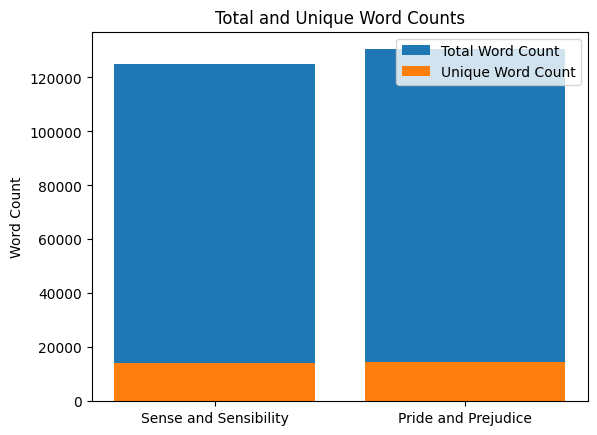

In [ ]:
# Plot bar chart for total and unique word counts
fig, ax = plt.subplots()
ax.bar(["Sense and Sensibility", "Pride and Prejudice"], [total_word_count_sense, total_word_count_pride], label='Total Word Count')
ax.bar(["Sense and Sensibility", "Pride and Prejudice"], [unique_word_count_sense, unique_word_count_pride], label='Unique Word Count')
ax.set_ylabel('Word Count')
ax.legend()
plt.title('Total and Unique Word Counts')
plt.show()

I'll now make a bar chart for average word length betwen the two books.

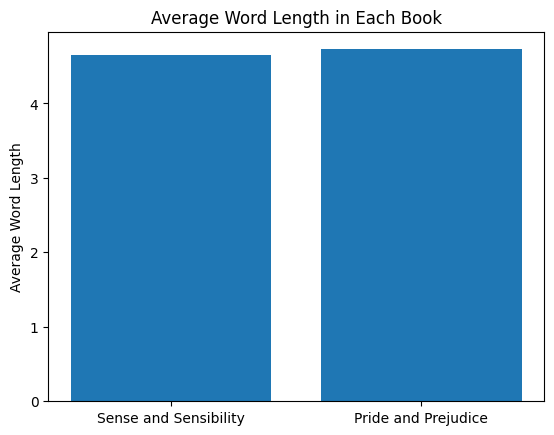

In [23]:
# Plot bar chart for average word length
fig, ax = plt.subplots()
ax.bar(["Sense and Sensibility", "Pride and Prejudice"], [average_word_length_sense, average_word_length_pride])
ax.set_ylabel('Average Word Length')
plt.title('Average Word Length in Each Book')
plt.show()

I will now make a line chart. showing the increase in word counts as both books progress to their ends. 

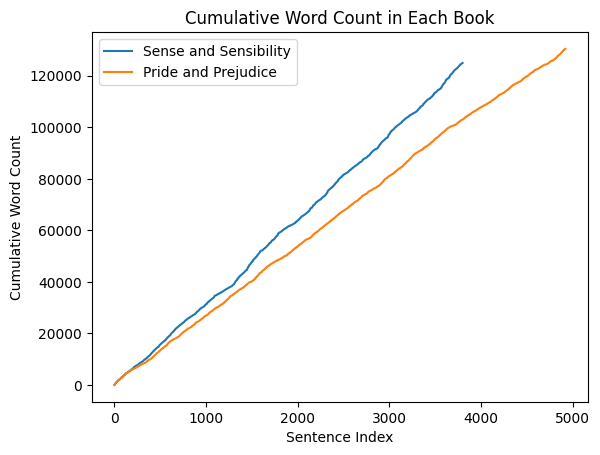

In [ ]:
# Create line chart for cumulative word count
fig, ax = plt.subplots()
ax.plot(sense_data_df['Word_Count'], label='Sense and Sensibility')
ax.plot(pride_data_df['Word_Count'], label='Pride and Prejudice')
ax.set_xlabel('Sentence Index')
ax.set_ylabel('Cumulative Word Count')
ax.legend()
plt.title('Cumulative Word Count in Each Book')
plt.show()

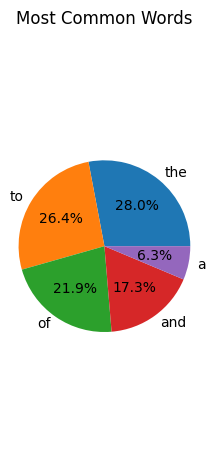

In [ ]:
query = "SELECT Words, COUNT(*) as Count FROM merged_df GROUP BY Words ORDER BY Count DESC LIMIT 5"
result = ps.sqldf(query) 

# Pie Chart
plt.subplot(1, 3, 3)
plt.pie(result["Count"], labels=result["Words"], autopct="%1.1f%%")
plt.title("Most Common Words")
plt.axis("equal")

plt.tight_layout()
plt.show()